In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

### Trabalhando com a base de dados do SAEB referente aos alunos do 9º ano do estado do Rio de Janeiro

#### Lendo e tratando a base de dados

In [2]:
colunas = ['ID_UF' , 'ID_AREA', 'IN_PUBLICA',
           'PROFICIENCIA_MT_SAEB', 'TX_RESP_Q01', 'TX_RESP_Q02', 
           'TX_RESP_Q04', 'TX_RESP_Q11c', 'TX_RESP_Q11h', 'TX_RESP_Q12b', 'TX_RESP_Q18', 'TX_RESP_Q20b']

In [3]:
df = pd.read_csv('TS_ALUNO_9EF.csv', sep=';', usecols = colunas)

In [4]:
df

,ID_UF,ID_AREA,IN_PUBLICA,PROFICIENCIA_MT_SAEB,TX_RESP_Q01,TX_RESP_Q02,TX_RESP_Q04,TX_RESP_Q11c,TX_RESP_Q11h,TX_RESP_Q12b,TX_RESP_Q18,TX_RESP_Q20b
0,11,2,1,234.739479,A,B,A,A,D,B,A,B
1,11,2,1,165.188854,A,E,C,B,D,B,C,D
2,11,2,1,NaN,.,.,.,.,.,.,.,.
3,11,2,1,NaN,.,.,.,.,.,.,.,.
4,11,2,1,208.589694,B,B,A,C,D,B,.,*
...,...,...,...,...,...,...,...,...,...,...,...,...
2591932,53,1,0,NaN,.,.,.,.,.,.,.,.
2591933,53,1,0,NaN,.,.,.,.,.,.,.,.
2591934,53,1,0,NaN,.,.,.,.,.,.,.,.
2591935,53,1,0,NaN,.,.,.,.,.,.,.,.


In [5]:
df.columns

Index(['ID_UF', 'ID_AREA', 'IN_PUBLICA', 'PROFICIENCIA_MT_SAEB', 'TX_RESP_Q01',
       'TX_RESP_Q02', 'TX_RESP_Q04', 'TX_RESP_Q11c', 'TX_RESP_Q11h',
       'TX_RESP_Q12b', 'TX_RESP_Q18', 'TX_RESP_Q20b'],
      dtype='object')

In [6]:
df.columns = ['UF', 'Área', 'Pública ou privada?', 'Proficiência em matemática', 'Gênero',
       'Idade', 'Cor', 'Quantos computadores têm na sua casa?', 'Quantos celulares com internet têm na sua casa?',
       'Na sua casa tem Wi-fi?', 'Você já foi reprovado(a)?', 'Fora da escola em dias de aula, quanto tempo você usa para estudar?']

In [7]:
df['Área'] = df['Área'].replace({1 : 'capital', 2 : 'interior'})


In [8]:
df['Gênero'] = df['Gênero'].replace({'A' : 'Masculino', 'B' : 'Feminino', '*' : 'Nulo', '.' : 'Branco'})

In [9]:
df['Idade'] = df['Idade'].replace({'A' : '13 anos ou menos', 'B' : '14 anos', 'C' : '15 anos', 'D' : '16 anos', 'E' : '17 anos', 'F' : '18 anos ou mais', '*' : 'Nulo', '.' : 'Branco' })

In [10]:
df['Cor'] = df['Cor'].replace({'A' : 'Branca', 'B' : 'Preta', 'C' : 'Parda', 'D' : 'Amarela', 'E' : 'Indígena', 'F' : 'Não declarado', '*' : 'Nulo', '.' : 'Branco' })

In [11]:
df['Quantos computadores têm na sua casa?'] = df['Quantos computadores têm na sua casa?'].replace({'A' : 'Nenhum', 'B' : '1', 'C' : '2', 'D' : '3 ou mais', '*' : 'Nulo', '.' : 'Branco'})

In [12]:
df['Quantos celulares com internet têm na sua casa?'] = df['Quantos celulares com internet têm na sua casa?'].replace({'A' : 'Nenhum', 'B' : '1', 'C' : '2', 'D' : '3 ou mais', '*' : 'Nulo', '.' : 'Branco'})

In [13]:
df['Na sua casa tem Wi-fi?'] = df['Na sua casa tem Wi-fi?'].replace({'A' : 'Não', 'B' : 'Sim', '*' : 'Nulo', '.' : 'Branco'})

In [14]:
df['Fora da escola em dias de aula, quanto tempo você usa para estudar?'] = df['Fora da escola em dias de aula, quanto tempo você usa para estudar?'].replace({'A' : 'Nenhuma', 'B' : 'Menos de 1 hora', 'C' : 'Entre 1 e 2 horas', 'D' : 'Mais de 2 horas', '*' : 'Nulo', '.' : 'Branco'})

In [15]:
df['Você já foi reprovado(a)?'] = df['Você já foi reprovado(a)?'].replace({'A' : 'Não', 'B' : '1 vez', 'C' : '2 vezes ou mais', '*' : 'Nulo', '.' : 'Branco'})

In [16]:
df

,UF,Área,Pública ou privada?,Proficiência em matemática,Gênero,Idade,Cor,Quantos computadores têm na sua casa?,Quantos celulares com internet têm na sua casa?,Na sua casa tem Wi-fi?,Você já foi reprovado(a)?,"Fora da escola em dias de aula, quanto tempo você usa para estudar?"
0,11,interior,1,234.739479,Masculino,14 anos,Branca,Nenhum,3 ou mais,Sim,Não,Menos de 1 hora
1,11,interior,1,165.188854,Masculino,17 anos,Parda,1,3 ou mais,Sim,2 vezes ou mais,Mais de 2 horas
2,11,interior,1,NaN,Branco,Branco,Branco,Branco,Branco,Branco,Branco,Branco
3,11,interior,1,NaN,Branco,Branco,Branco,Branco,Branco,Branco,Branco,Branco
4,11,interior,1,208.589694,Feminino,14 anos,Branca,2,3 ou mais,Sim,Branco,Nulo
...,...,...,...,...,...,...,...,...,...,...,...,...
2591932,53,capital,0,NaN,Branco,Branco,Branco,Branco,Branco,Branco,Branco,Branco
2591933,53,capital,0,NaN,Branco,Branco,Branco,Branco,Branco,Branco,Branco,Branco
2591934,53,capital,0,NaN,Branco,Branco,Branco,Branco,Branco,Branco,Branco,Branco
2591935,53,capital,0,NaN,Branco,Branco,Branco,Branco,Branco,Branco,Branco,Branco


In [17]:
df.dtypes

UF                                                                       int64
Área                                                                    object
Pública ou privada?                                                      int64
Proficiência em matemática                                             float64
Gênero                                                                  object
Idade                                                                   object
Cor                                                                     object
Quantos computadores têm na sua casa?                                   object
Quantos celulares com internet têm na sua casa?                         object
Na sua casa tem Wi-fi?                                                  object
Você já foi reprovado(a)?                                               object
Fora da escola em dias de aula, quanto tempo você usa para estudar?     object
dtype: object

In [18]:
# excluindo as entradas duplicadas (pelo que analisei, são as entradas correspondentes aos dados não preenchidos, ou seja, às provas de matemática que não foram preenchidas)

df = df.drop_duplicates()


In [19]:
df.shape

(1913036, 12)

In [20]:
df.isnull().sum()

UF                                                                       0
Área                                                                     0
Pública ou privada?                                                      0
Proficiência em matemática                                             904
Gênero                                                                   0
Idade                                                                    0
Cor                                                                      0
Quantos computadores têm na sua casa?                                    0
Quantos celulares com internet têm na sua casa?                          0
Na sua casa tem Wi-fi?                                                   0
Você já foi reprovado(a)?                                                0
Fora da escola em dias de aula, quanto tempo você usa para estudar?      0
dtype: int64

In [21]:
#Como o número de entradas nulas na coluna Proficiência em matemática corresponde a um número insignificante diante do total (0,05% das linhas), decidi excluí-las.
df = df.dropna(subset=['Proficiência em matemática'])

In [22]:
df.shape

(1912132, 12)

In [23]:
df['UF'].unique()

array([11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31,
       32, 33, 35, 41, 42, 43, 50, 51, 52, 53], dtype=int64)

#### Definindo uma dataframe apenas com os dados referentes ao estado do Rio de Janeiro e à rede pública de ensino

In [28]:
#Vamos trabalhar apenas com os dados das escolas do estado do Rio de Janeiro, que nesta base de dados corresponde ao número 33.
id_uf_rj = [33]
df_rj = df[df['UF'].isin(id_uf_rj)]
df_rj

,UF,Área,Pública ou privada?,Proficiência em matemática,Gênero,Idade,Cor,Quantos computadores têm na sua casa?,Quantos celulares com internet têm na sua casa?,Na sua casa tem Wi-fi?,Você já foi reprovado(a)?,"Fora da escola em dias de aula, quanto tempo você usa para estudar?"
1361117,33,interior,1,171.789179,Masculino,14 anos,Parda,Branco,1,Branco,Não,Entre 1 e 2 horas
1361118,33,interior,1,322.009368,Masculino,14 anos,Parda,2,3 ou mais,Sim,Não,Nenhuma
1361119,33,interior,1,292.794337,Feminino,15 anos,Preta,1,3 ou mais,Sim,Não,Nenhuma
1361120,33,interior,1,298.394524,Masculino,15 anos,Branca,2,3 ou mais,Sim,Branco,Branco
1361121,33,interior,1,234.420557,Feminino,15 anos,Preta,Nenhum,2,Sim,Não,Nulo
...,...,...,...,...,...,...,...,...,...,...,...,...
1509352,33,interior,1,167.897676,Masculino,14 anos,Parda,1,3 ou mais,Sim,Não,Nenhuma
1509353,33,interior,1,255.231227,Masculino,15 anos,Não declarado,1,3 ou mais,Sim,Não,Mais de 2 horas
1509354,33,interior,1,334.738566,Masculino,14 anos,Parda,Nenhum,3 ou mais,Sim,Não,Nenhuma
1509356,33,interior,1,291.197269,Masculino,15 anos,Parda,1,3 ou mais,Sim,1 vez,Nenhuma


In [25]:
df_rj.to_csv("df_SAEB_tratado.csv")

In [29]:
# Vamos utilizar apenas os dados referentes aos alunos das escolas públicas. 
#Nesta base de dados, o número 1 corresponde à rede pública e o número 0 à rede privada.
publico = [1]
df_rj = df_rj[df_rj['Pública ou privada?'].isin(publico)]
df_rj

,UF,Área,Pública ou privada?,Proficiência em matemática,Gênero,Idade,Cor,Quantos computadores têm na sua casa?,Quantos celulares com internet têm na sua casa?,Na sua casa tem Wi-fi?,Você já foi reprovado(a)?,"Fora da escola em dias de aula, quanto tempo você usa para estudar?"
1361117,33,interior,1,171.789179,Masculino,14 anos,Parda,Branco,1,Branco,Não,Entre 1 e 2 horas
1361118,33,interior,1,322.009368,Masculino,14 anos,Parda,2,3 ou mais,Sim,Não,Nenhuma
1361119,33,interior,1,292.794337,Feminino,15 anos,Preta,1,3 ou mais,Sim,Não,Nenhuma
1361120,33,interior,1,298.394524,Masculino,15 anos,Branca,2,3 ou mais,Sim,Branco,Branco
1361121,33,interior,1,234.420557,Feminino,15 anos,Preta,Nenhum,2,Sim,Não,Nulo
...,...,...,...,...,...,...,...,...,...,...,...,...
1509352,33,interior,1,167.897676,Masculino,14 anos,Parda,1,3 ou mais,Sim,Não,Nenhuma
1509353,33,interior,1,255.231227,Masculino,15 anos,Não declarado,1,3 ou mais,Sim,Não,Mais de 2 horas
1509354,33,interior,1,334.738566,Masculino,14 anos,Parda,Nenhum,3 ou mais,Sim,Não,Nenhuma
1509356,33,interior,1,291.197269,Masculino,15 anos,Parda,1,3 ou mais,Sim,1 vez,Nenhuma


In [30]:
[df_rj['Cor'].value_counts(normalize=True)]

[Cor
 Parda            0.361683
 Branca           0.283542
 Preta            0.219438
 Não declarado    0.051727
 Branco           0.043331
 Amarela          0.024160
 Indígena         0.014133
 Nulo             0.001986
 Name: proportion, dtype: float64]

In [ ]:
df_rj.to_csv("df_SAEB_tratado.csv")

#### Vamos utilizar histogramas para visualizar com mais clareza a proficiência em matemática dos alunos do 9º ano da rede pública do estado do RJ inteiro, assim como da capital e do interior do estado separadamente.

Text(0, 0.5, '')

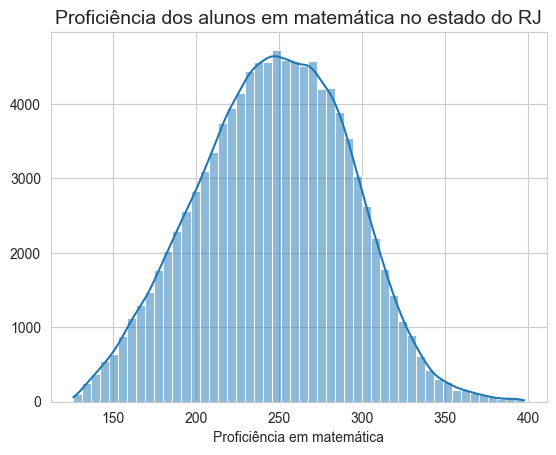

In [28]:
sns.histplot(df_rj['Proficiência em matemática'], kde = True, bins = 50)
plt.title('Proficiência dos alunos em matemática no estado do RJ', fontsize = 14)
plt.ylabel('')

A maior parte dos alunos avaliados tem uma proficiência em matemática de cerca de 250, de acordo com a pesquisa do Saeb. Os pontos fora da curva mais baixos estão próximos de 100 e os mais altos (e mais raros ainda) estão próximos de 400.

In [29]:
# Nesta etapa, vamos utilizar apenas os dados referentes aos alunos das escolas públicas do interior do estado. 
#Nesta base de dados, o número 2 corresponde à rede pública do interior e o número 1 à da capital.
#interior = [2]
df_filtrado_interior = df_rj[df_rj['Área'].str.match('interior')]
df_filtrado_interior

,UF,Área,Pública ou privada?,Proficiência em matemática,Gênero,Idade,Cor,Quantos computadores têm na sua casa?,Quantos celulares com internet têm na sua casa?,Na sua casa tem Wi-fi?,Você já foi reprovado(a)?,"Fora da escola em dias de aula, quanto tempo você usa para estudar?"
1361117,33,interior,1,171.789179,Masculino,14 anos,Parda,Branco,1,Branco,Não,Entre 1 e 2 horas
1361118,33,interior,1,322.009368,Masculino,14 anos,Parda,2,3 ou mais,Sim,Não,Nenhuma
1361119,33,interior,1,292.794337,Feminino,15 anos,Preta,1,3 ou mais,Sim,Não,Nenhuma
1361120,33,interior,1,298.394524,Masculino,15 anos,Branca,2,3 ou mais,Sim,Branco,Branco
1361121,33,interior,1,234.420557,Feminino,15 anos,Preta,Nenhum,2,Sim,Não,Nulo
...,...,...,...,...,...,...,...,...,...,...,...,...
1509352,33,interior,1,167.897676,Masculino,14 anos,Parda,1,3 ou mais,Sim,Não,Nenhuma
1509353,33,interior,1,255.231227,Masculino,15 anos,Não declarado,1,3 ou mais,Sim,Não,Mais de 2 horas
1509354,33,interior,1,334.738566,Masculino,14 anos,Parda,Nenhum,3 ou mais,Sim,Não,Nenhuma
1509356,33,interior,1,291.197269,Masculino,15 anos,Parda,1,3 ou mais,Sim,1 vez,Nenhuma


Text(0.5, 1.0, 'Proficiência dos alunos em matemática no interior do RJ')

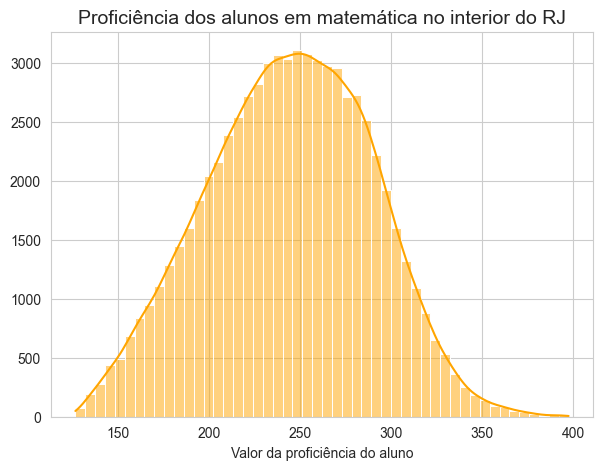

In [30]:
plt.figure(figsize=(7,5))
sns.histplot(df_filtrado_interior['Proficiência em matemática'], kde = True, color = 'orange',bins = 50)
plt.xlabel('Valor da proficiência do aluno')
plt.ylabel('')
plt.title('Proficiência dos alunos em matemática no interior do RJ', fontsize = 14)

Na rede pública localizada no interior do RJ há mais alunos do 9º ano com média abaixo de 250. Esses alunos apresentam uma proficiência em matemática menor que a média do estado inteiro.

In [31]:

df_filtrado_capital = df_rj[df_rj['Área'].str.match('capital')]
df_filtrado_capital

,UF,Área,Pública ou privada?,Proficiência em matemática,Gênero,Idade,Cor,Quantos computadores têm na sua casa?,Quantos celulares com internet têm na sua casa?,Na sua casa tem Wi-fi?,Você já foi reprovado(a)?,"Fora da escola em dias de aula, quanto tempo você usa para estudar?"
1439451,33,capital,1,198.362460,Feminino,17 anos,Parda,1,2,Sim,1 vez,Entre 1 e 2 horas
1439452,33,capital,1,218.238442,Feminino,16 anos,Preta,1,2,Sim,1 vez,Nenhuma
1439454,33,capital,1,254.448678,Feminino,15 anos,Branca,Nenhum,1,Sim,Não,Nenhuma
1439455,33,capital,1,260.334085,Feminino,14 anos,Preta,Nenhum,2,Não,Não,Nenhuma
1439456,33,capital,1,239.665940,Feminino,14 anos,Branca,2,3 ou mais,Sim,Não,Nenhuma
...,...,...,...,...,...,...,...,...,...,...,...,...
1485083,33,capital,1,243.434983,Feminino,14 anos,Branca,Nenhum,3 ou mais,Sim,Não,Nenhuma
1485084,33,capital,1,303.680541,Feminino,14 anos,Branca,2,3 ou mais,Sim,Não,Nenhuma
1485085,33,capital,1,244.658131,Feminino,14 anos,Parda,Nenhum,3 ou mais,Sim,Não,Nenhuma
1485086,33,capital,1,234.582421,Feminino,14 anos,Parda,Nenhum,3 ou mais,Sim,Não,Nenhuma


Text(0.5, 1.0, 'Proficiência dos alunos em matemática na capital do RJ')

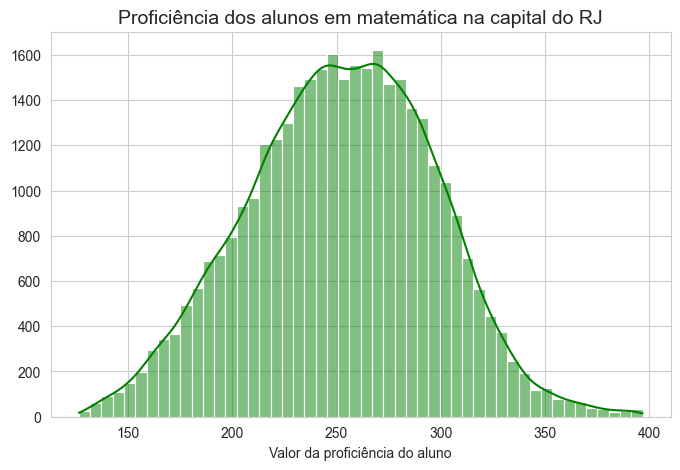

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(df_filtrado_capital['Proficiência em matemática'], kde = True, color = 'green',  bins=50)
plt.xlabel('Valor da proficiência do aluno')
plt.ylabel('')
plt.title('Proficiência dos alunos em matemática na capital do RJ', fontsize = 14)

Observamos pelo gráfico acima que os alunos do 9º ano das escolas públicas da capital do estado RJ obtiveram melhor proficência em matemática, em comparação com os alunos do interior do estado.

#### A partir deste ponto, vamos analisar mais de perto a população dos alunos do 9º ano da rede pública do RJ, descobrindo através das visualizações a proporção de alunos e alunas por gênero e cor na capital e no interior do estado, quantos possuem acesso à internet em casa, quanto tempo dedicam ao estudo quando não estão na escola etc.

Text(0, 0.5, '')

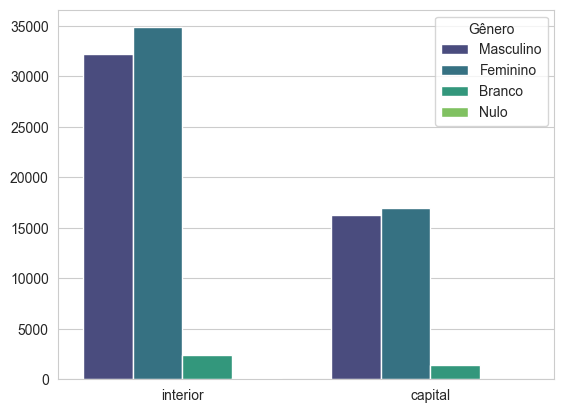

In [33]:
sns.countplot(data = df_rj, x = 'Área', hue = 'Gênero', palette = 'viridis')
plt.xlabel('')
plt.ylabel('')

Tanto no interior quanto na capital do RJ temos mais alunas que alunos matriculados na rede pública de ensino no 9º ano, sendo que no interior a diferença entre o número de alunos e alunas é mais evidente.

Text(0, 0.5, '')

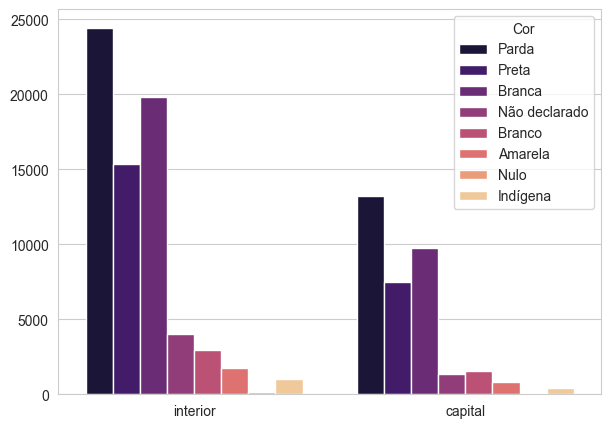

In [34]:
plt.figure(figsize=(7, 5))
sns.countplot(data = df_rj, x = 'Área', hue = 'Cor', palette = 'magma')
plt.xlabel('')
plt.ylabel('')


Tanto no interior quanto na capital, a quantidade de alunos da rede pública que se declaram pardos é predominante. Em segundo lugar, alunos que se declaram brancos, e em terceiro, os que se declaram pretos.

Text(0, 0.5, '')

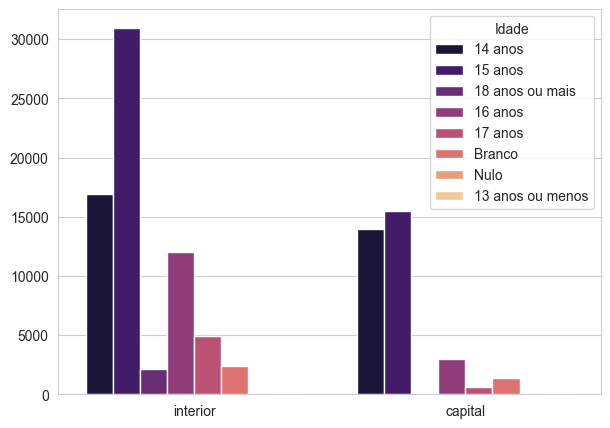

In [35]:
plt.figure(figsize=(7, 5))
sns.countplot(data = df_rj, x = 'Área', hue = 'Idade', palette = 'magma')
plt.xlabel('')
plt.ylabel('')


In [36]:
df_filtrado_capital['Idade'].value_counts(normalize=True)

Idade
15 anos             0.447339
14 anos             0.402856
16 anos             0.086802
Branco              0.039781
17 anos             0.017107
18 anos ou mais     0.003173
13 anos ou menos    0.002481
Nulo                0.000462
Name: proportion, dtype: float64

Tanto no interior quanto na capital a maior parte dos alunos tem 14 e 15 anos, a idade correspondente ao 9ª ano. Mas no interior cerca de 17% dos alunos do 9º ano da rede têm 16 anos (contra cerca de 9% na capital), o que pode indicar um número de repetentes que não deve ser ignorado.

In [37]:
df_rj['Na sua casa tem Wi-fi?'].value_counts(normalize=True)

Na sua casa tem Wi-fi?
Sim       0.848572
Não       0.093906
Branco    0.052322
Nulo      0.005200
Name: proportion, dtype: float64

#### Resposta dos alunos da rede pública do estado do RJ à pergunta 'Na sua casa tem Wi-Fi?'

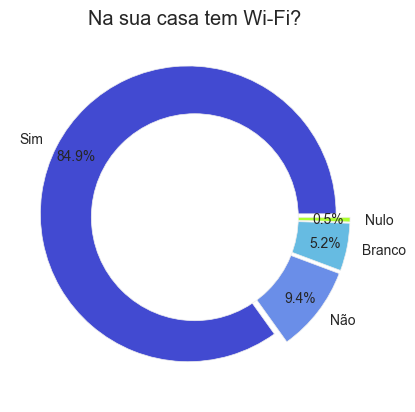

In [38]:
plt.style.use('ggplot')
labels = ['Sim', 'Não', 'Branco', 'Nulo']
valores = [84.9, 9.4, 5.2, 0.5]

colors = ['#424ad1', '#6a8ee8', '#66bbe2', 
          '#ADFF2F', '#FFA500']
explode = (0.05, 0.05, 0.05, 0.05)
plt.pie(valores, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.title('Na sua casa tem Wi-Fi?')

plt.show()

In [39]:
df_filtrado_capital['Na sua casa tem Wi-fi?'].value_counts(normalize=True)

Na sua casa tem Wi-fi?
Sim       0.829078
Não       0.113169
Branco    0.053224
Nulo      0.004529
Name: proportion, dtype: float64

In [40]:
df_filtrado_interior['Na sua casa tem Wi-fi?'].value_counts(normalize=True)

Na sua casa tem Wi-fi?
Sim       0.858287
Não       0.084306
Branco    0.051872
Nulo      0.005535
Name: proportion, dtype: float64

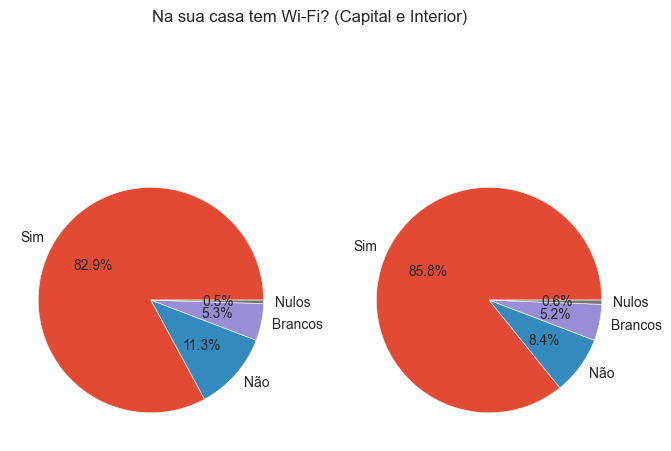

In [41]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
 
sizes = [82.9, 11.3, 5.3, 0.5]
labels = ['Sim', 'Não', 'Brancos', 'Nulos']


sizes2 = [85.8, 8.4, 5.2, 0.6] 
labels2 = ['Sim', 'Não', 'Brancos', 'Nulos']


plt.suptitle('Na sua casa tem Wi-Fi? (Capital e Interior)')
ax1.pie(sizes, labels=labels, autopct = '%1.1f%%')

ax2.pie(sizes2, labels=labels2, autopct = '%1.1f%%') 

plt.show()

Os três gráficos acima mostram que a grande maioria dos alunos têm Wi-Fi em casa tanto na capital quanto no interior do RJ.

#### Resposta dos alunos da rede pública do estado do RJ à pergunta 'Quantos computadores têm na sua casa?'

Text(0, 0.5, '')

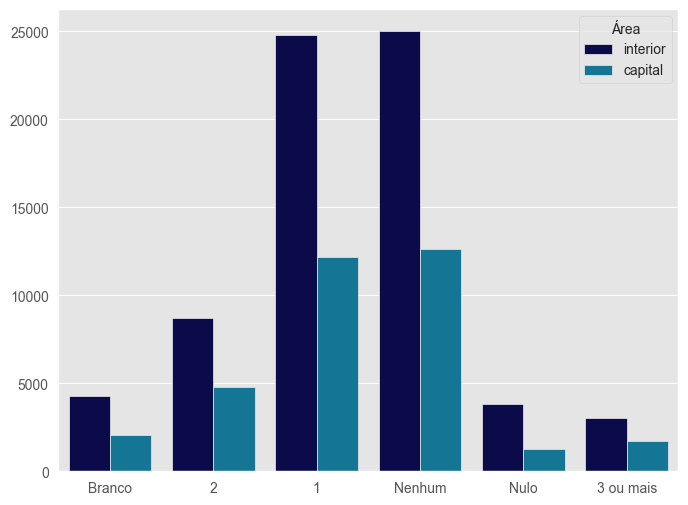

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df_rj, x = 'Quantos computadores têm na sua casa?', hue = 'Área', palette = 'ocean')
plt.xlabel('')
plt.ylabel('')

#### Resposta dos alunos da rede pública do estado do RJ à pergunta 'Quantos celulares com internet têm na sua casa?'

Text(0, 0.5, '')

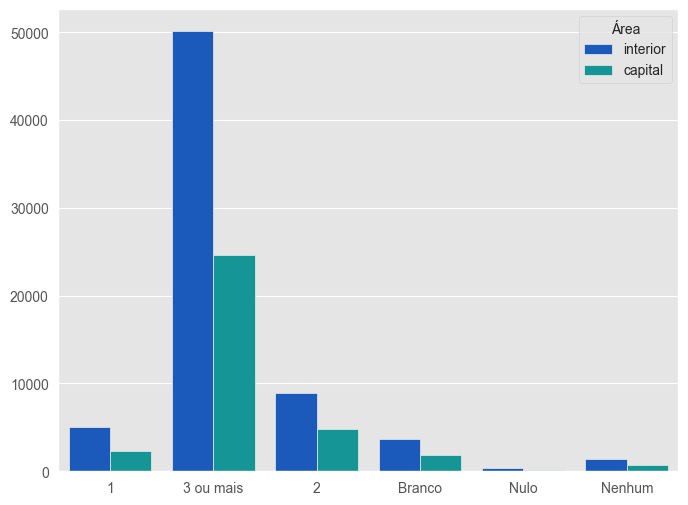

In [73]:
#Quantos celulares com internet têm na sua casa?
plt.figure(figsize=(8, 6))
sns.countplot(data = df_rj, x = 'Quantos celulares com internet têm na sua casa?', hue = 'Área', palette = 'winter')
plt.xlabel('')
plt.ylabel('')

#### Resposta dos alunos da rede pública do estado do RJ à pergunta 'Você já foi reprovado(a)?'

Text(0, 0.5, '')

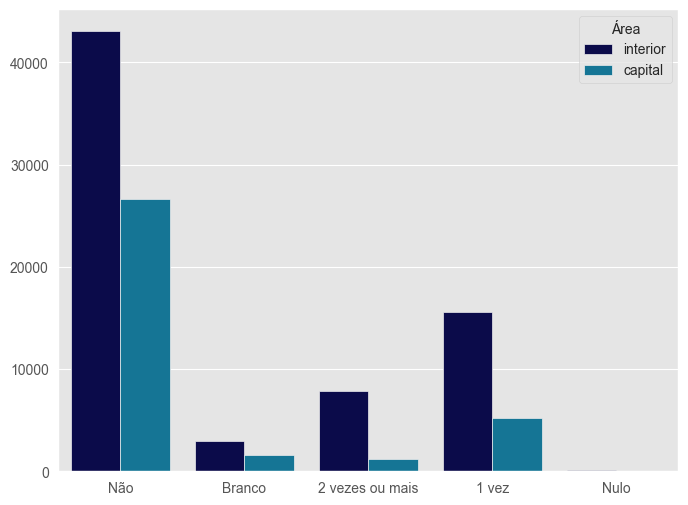

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df_rj, x = 'Você já foi reprovado(a)?', hue = 'Área', palette = 'ocean')
plt.xlabel('')
plt.ylabel('')

#### Nesta seção vamos analisar o desempenho em matemática dos alunos do 9º ano da rede pública do RJ de acordo com a cor e o gênero.

In [44]:
df_desempenho_cor = df_rj.loc[:, ["Cor", "Proficiência em matemática"]]
df_desempenho_cor

,Cor,Proficiência em matemática
1361117,Parda,171.789179
1361118,Parda,322.009368
1361119,Preta,292.794337
1361120,Branca,298.394524
1361121,Preta,234.420557
...,...,...
1509352,Parda,167.897676
1509353,Não declarado,255.231227
1509354,Parda,334.738566
1509356,Parda,291.197269


In [45]:
#Criando um df filtrado somente com alunos que se declararam pretos ou pardos
filtro = df_desempenho_cor["Cor"].str.match('Parda') | df_desempenho_cor["Cor"].str.match('Preta') 
df_negros = df_desempenho_cor[filtro]
df_negros

,Cor,Proficiência em matemática
1361117,Parda,171.789179
1361118,Parda,322.009368
1361119,Preta,292.794337
1361121,Preta,234.420557
1361123,Parda,219.420621
...,...,...
1509346,Parda,303.840337
1509350,Parda,323.861472
1509352,Parda,167.897676
1509354,Parda,334.738566


In [46]:
desempenho_medio_negros = df_negros["Proficiência em matemática"].mean()
desempenho_medio_negros

243.81554093600263

Text(0.5, 1.0, 'Proficiência em matemática dos alunos negros do 9º ano da rede pública do RJ')

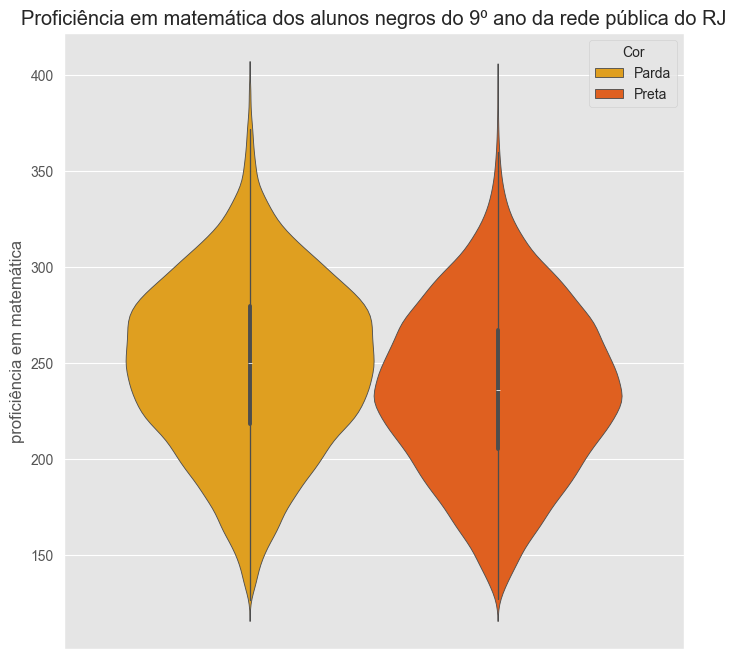

In [47]:
plt.figure(figsize=(8, 8))
sns.violinplot(data = df_negros, y = 'Proficiência em matemática', hue = 'Cor', palette = 'autumn_r')
plt.xlabel('')
plt.ylabel('proficiência em matemática')
plt.title('Proficiência em matemática dos alunos negros do 9º ano da rede pública do RJ')

O gráfico acima mostra como há um maior número de alunos pardos com um desempenho em matemática entre 300 e 400 (acima da média do estado), em comparação com os pretos. A maior parte dos alunos pretos apresenta uma proficiência em matemática abaixo de 250, enquanto entre os alunos pardos a maior parte apresenta um desempenho nesta disciplina entre 250 e 300.

Text(0, 0.5, 'Contagem de alunos')

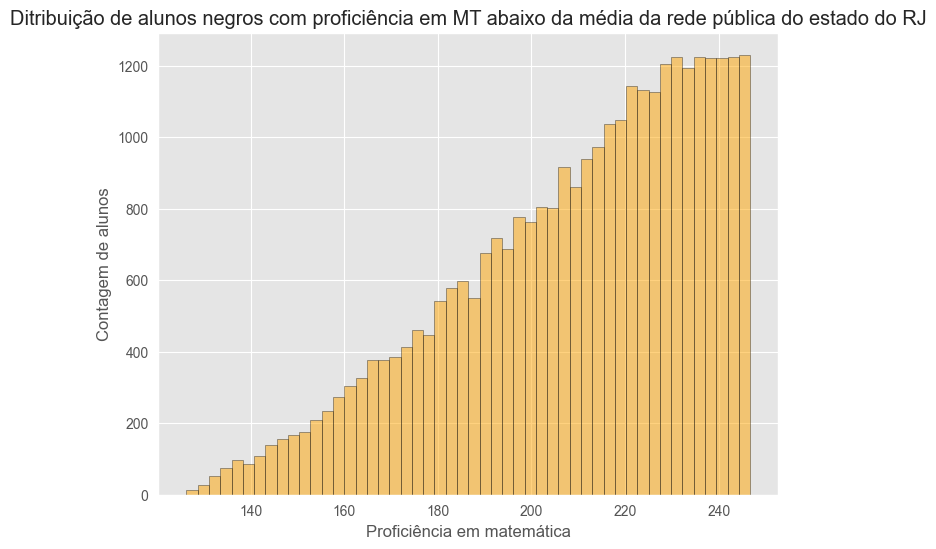

In [48]:
plt.figure(figsize=(8, 6))
df_negros[df_negros["Proficiência em matemática"] < 246.7]["Proficiência em matemática"].hist(bins = 50, ec = "k", alpha = 0.5, color = "orange")
plt.title("Ditribuição de alunos negros com proficiência em MT abaixo da média da rede pública do estado do RJ")
plt.xlabel("Proficiência em matemática")
plt.ylabel("Contagem de alunos")

In [49]:
filtro = df_desempenho_cor["Cor"].str.match('Branca')  
df_brancos = df_desempenho_cor[filtro]
df_brancos

,Cor,Proficiência em matemática
1361120,Branca,298.394524
1361122,Branca,283.794442
1361125,Branca,330.867967
1361126,Branca,223.335208
1361128,Branca,293.217106
...,...,...
1509337,Branca,247.978024
1509348,Branca,334.344358
1509349,Branca,236.666925
1509351,Branca,345.911107


Text(0, 0.5, 'Contagem de alunos')

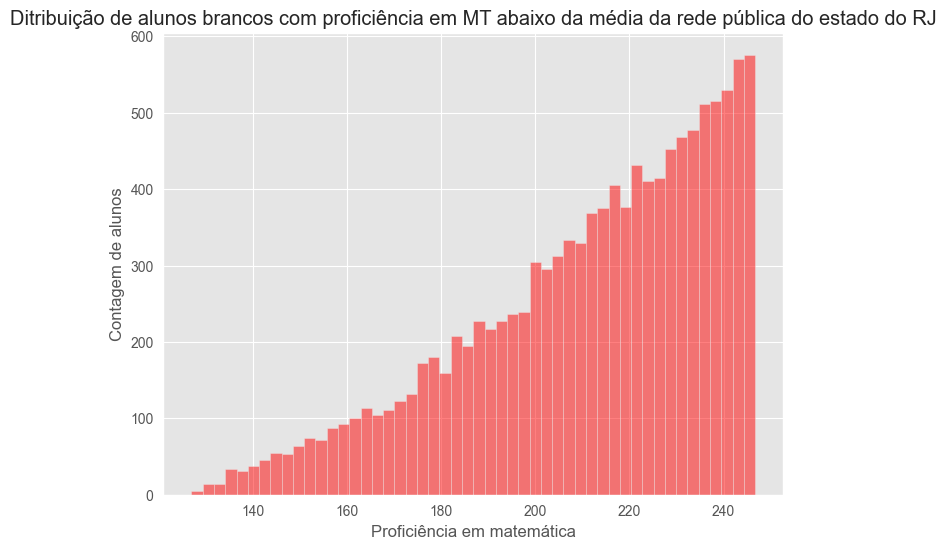

In [50]:
plt.figure(figsize=(8, 6))
df_brancos[df_brancos["Proficiência em matemática"] < 246.7]["Proficiência em matemática"].hist(bins = 50, alpha = 0.5, color = "red")
plt.title("Ditribuição de alunos brancos com proficiência em MT abaixo da média da rede pública do estado do RJ")
plt.xlabel("Proficiência em matemática")
plt.ylabel("Contagem de alunos")

Os dois últimos histogramas mostram que há uma quatidade maior de alunos negros com um índice mais baixo de proficiência (menor que 200) em comparação com os brancos. A descida mais íngreme do gráfido referente aos alunos brancos mostra que há uma menor proporção de alunos com desempenho baixo, em comparação com os alunos negros.

In [51]:
df_rj.columns

Index(['UF', 'Área', 'Pública ou privada?', 'Proficiência em matemática',
       'Gênero', 'Idade', 'Cor', 'Quantos computadores têm na sua casa?',
       'Quantos celulares com internet têm na sua casa?',
       'Na sua casa tem Wi-fi?', 'Você já foi reprovado(a)?',
       'Fora da escola em dias de aula, quanto tempo você usa para estudar?'],
      dtype='object')

In [52]:
df_desempenho_genero = df_rj.loc[:, ["Proficiência em matemática", "Gênero"]]
df_desempenho_genero

,Proficiência em matemática,Gênero
1361117,171.789179,Masculino
1361118,322.009368,Masculino
1361119,292.794337,Feminino
1361120,298.394524,Masculino
1361121,234.420557,Feminino
...,...,...
1509352,167.897676,Masculino
1509353,255.231227,Masculino
1509354,334.738566,Masculino
1509356,291.197269,Masculino


In [53]:
# Excluindo os brancos e nulos
filtro = df_desempenho_genero["Gênero"].str.match('Masculino') | df_desempenho_genero["Gênero"].str.match('Feminino') 
df_genero = df_desempenho_genero[filtro]
df_genero

,Proficiência em matemática,Gênero
1361117,171.789179,Masculino
1361118,322.009368,Masculino
1361119,292.794337,Feminino
1361120,298.394524,Masculino
1361121,234.420557,Feminino
...,...,...
1509352,167.897676,Masculino
1509353,255.231227,Masculino
1509354,334.738566,Masculino
1509356,291.197269,Masculino


Text(0.5, 1.0, 'Proficiência em matemática dos alunos do 9º ano da rede pública do RJ de acordo com o gênero')

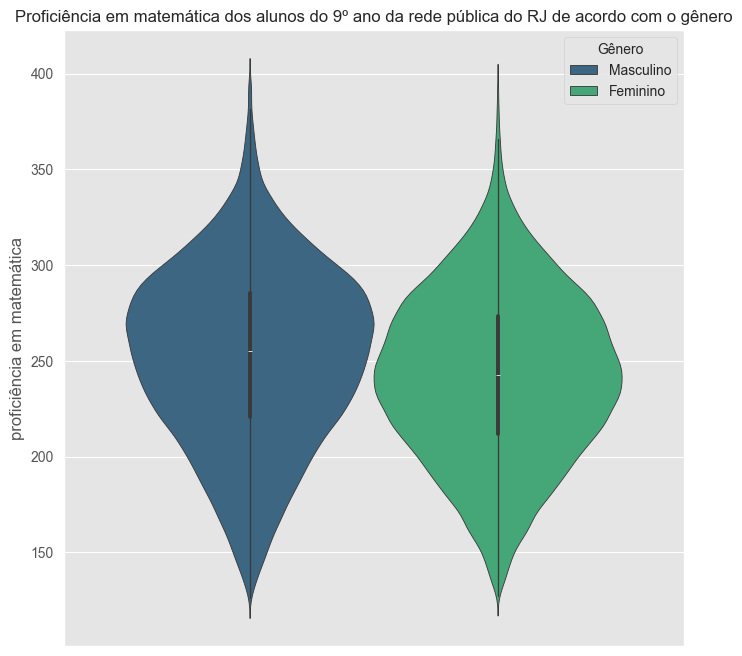

In [54]:
plt.figure(figsize=(8, 8))
sns.violinplot(data = df_genero, y = 'Proficiência em matemática', hue = 'Gênero', palette = 'viridis')
plt.xlabel('')
plt.ylabel('proficiência em matemática')
plt.title('Proficiência em matemática dos alunos do 9º ano da rede pública do RJ de acordo com o gênero', fontsize = 12)

De acordo com a visualização acima, os alunos apresentam melhor desempenho em matemática do que as alunas. A maior parte deles obtiveram uma proficiência nesta disciplina entre 250 e 300, enquanto o índice de proficiência mais recorrente entre as alunas se encontra abaixo de 250.

### Trabalhando com a base de dados do Inse (Indicador do nível socioeconômico do Saeb) de 2021

In [55]:
colunas = ['NO_UF', 'NO_MUNICIPIO', 'TP_TIPO_REDE', 'TP_CAPITAL', 'MEDIA_INSE', 'INSE_CLASSIFICACAO']

In [56]:
df_inse = pd.read_excel('INSE_2021_escolas.xlsx', sheet_name = 'INSE_ESC_2021', usecols = colunas)
df_inse

,NO_UF,NO_MUNICIPIO,TP_TIPO_REDE,TP_CAPITAL,MEDIA_INSE,INSE_CLASSIFICACAO
0,Rondônia,Alta Floresta D'Oeste,3,2,4.74,Nível IV
1,Rondônia,Alta Floresta D'Oeste,3,2,4.84,Nível IV
2,Rondônia,Alta Floresta D'Oeste,2,2,4.75,Nível IV
3,Rondônia,Alta Floresta D'Oeste,3,2,4.97,Nível IV
4,Rondônia,Alta Floresta D'Oeste,2,2,5.13,Nível V
...,...,...,...,...,...,...
69815,Distrito Federal,Brasília,2,1,5.09,Nível V
69816,Distrito Federal,Brasília,2,1,4.92,Nível IV
69817,Distrito Federal,Brasília,2,1,5.20,Nível V
69818,Distrito Federal,Brasília,2,1,5.03,Nível V


In [57]:
df_inse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69820 entries, 0 to 69819
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NO_UF               69820 non-null  object 
 1   NO_MUNICIPIO        69820 non-null  object 
 2   TP_TIPO_REDE        69820 non-null  int64  
 3   TP_CAPITAL          69820 non-null  int64  
 4   MEDIA_INSE          69820 non-null  float64
 5   INSE_CLASSIFICACAO  69820 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 3.2+ MB


In [58]:
df_inse.columns = ['UF', 'Município', 'Tipo de rede', 'Localização', 'Média_Inse', 'Classificação_Inse']

In [59]:
df_inse['Tipo de rede'] = df_inse['Tipo de rede'].replace({1 : 'Federal', 2 : 'Estadual', 3 : 'Municipal'})

In [60]:
df_inse['Localização'] = df_inse['Localização'].replace({1 : 'Capital', 2 : 'Interior'})

In [61]:
df_inse

,UF,Município,Tipo de rede,Localização,Média_Inse,Classificação_Inse
0,Rondônia,Alta Floresta D'Oeste,Municipal,Interior,4.74,Nível IV
1,Rondônia,Alta Floresta D'Oeste,Municipal,Interior,4.84,Nível IV
2,Rondônia,Alta Floresta D'Oeste,Estadual,Interior,4.75,Nível IV
3,Rondônia,Alta Floresta D'Oeste,Municipal,Interior,4.97,Nível IV
4,Rondônia,Alta Floresta D'Oeste,Estadual,Interior,5.13,Nível V
...,...,...,...,...,...,...
69815,Distrito Federal,Brasília,Estadual,Capital,5.09,Nível V
69816,Distrito Federal,Brasília,Estadual,Capital,4.92,Nível IV
69817,Distrito Federal,Brasília,Estadual,Capital,5.20,Nível V
69818,Distrito Federal,Brasília,Estadual,Capital,5.03,Nível V


#### Analisando a dataframe que contém apenas os dados do estado do RJ 

In [62]:
df_inse_rj = df_inse[df_inse['UF'].str.match('Rio de Janeiro')]
df_inse_rj

,UF,Município,Tipo de rede,Localização,Média_Inse,Classificação_Inse
40013,Rio de Janeiro,Angra dos Reis,Estadual,Interior,4.95,Nível IV
40014,Rio de Janeiro,Angra dos Reis,Estadual,Interior,4.60,Nível IV
40015,Rio de Janeiro,Angra dos Reis,Estadual,Interior,4.74,Nível IV
40016,Rio de Janeiro,Angra dos Reis,Estadual,Interior,5.10,Nível V
40017,Rio de Janeiro,Angra dos Reis,Estadual,Interior,5.01,Nível V
...,...,...,...,...,...,...
44170,Rio de Janeiro,Volta Redonda,Estadual,Interior,4.94,Nível IV
44171,Rio de Janeiro,Volta Redonda,Estadual,Interior,4.85,Nível IV
44172,Rio de Janeiro,Volta Redonda,Municipal,Interior,4.86,Nível IV
44173,Rio de Janeiro,Volta Redonda,Estadual,Interior,5.68,Nível VI


In [63]:
df_inse_rj.to_csv("df_INSE_RJ_tratada.csv")

In [64]:
df_inse_rj['Tipo de rede'].value_counts(normalize=True)

Tipo de rede
Municipal    0.723210
Estadual     0.273426
Federal      0.003364
Name: proportion, dtype: float64

In [65]:
agrupado = df_inse_rj.groupby('Tipo de rede')
agrupado['Média_Inse'].mean()

Tipo de rede
Estadual     4.909675
Federal      5.440714
Municipal    4.886990
Name: Média_Inse, dtype: float64

Text(0.5, 1.0, 'Média Inse da rede pública do estado do RJ')

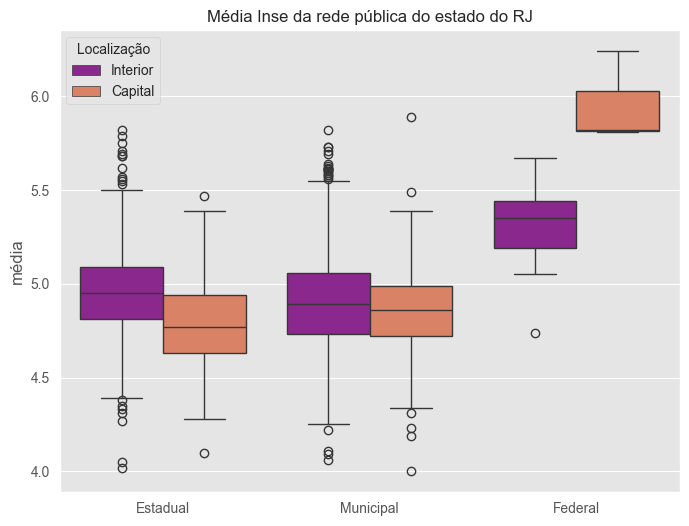

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df_inse_rj, x = 'Tipo de rede', hue= 'Localização', y = 'Média_Inse', palette = 'plasma')
plt.xlabel('')
plt.ylabel('média')
plt.title('Média Inse da rede pública do estado do RJ', fontsize = 12)

A maior parte das escolas da rede pública do estado do RJ são municipais (72%), enquanto as federais representam uma parcela mínima desta rede (0,3%, totalizando apenas 14 escolas). No gráfico acima, observamos que as escolas estaduais e as municipais apresentam uma média Inse próxima, embora as municipais tenham a média menor. Já as federais se destacam, com boa parte das escolas apresentando uma média acima de 5, diferentemente das municipais  estaduais, que têm média abaixo de 5. Também percebemos que, em toda a rede pública, as escolas localizadas na capital (Rio de Janeiro) apresentam um Inse maior que as localizadas no interior, especialmente entre as federais, grupo em que a diferença do índice entre essas duas localidades é maior.   